In [1]:
import os
import numpy as np
import gzip
from tensorflow import keras

# print(os.getcwd())

def load_data(data_folder):

  files = [
      'train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz',
      'test-labels-idx1-ubyte.gz', 'test-images-idx3-ubyte.gz'
  ]

  paths = []
  for fname in files:
    paths.append(os.path.join(data_folder,fname))
  

  with gzip.open(paths[0], 'rb') as lbpath:
    y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)

  with gzip.open(paths[1], 'rb') as imgpath:
    x_train = np.frombuffer(
        imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)

  with gzip.open(paths[2], 'rb') as lbpath:
    y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)

  with gzip.open(paths[3], 'rb') as imgpath:
    x_test = np.frombuffer(
        imgpath.read(), np.uint8, offset=16).reshape(len(y_test), 28, 28)

  return (x_train, y_train), (x_test, y_test)

(train_images, train_labels), (test_images, test_labels) = load_data('JPG-PNG-to-MNIST-NN-Format-master/')

2022-01-12 00:15:04.761140: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-12 00:15:04.761206: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(train_images_old, train_labels_old), (test_images_old, test_labels_old) = keras.datasets.mnist.load_data()

#https://stackoverflow.com/questions/43153076/how-to-concatenate-numpy-arrays-into-a-specific-shape
#must have same dim
train_images_old = train_images_old.reshape(train_images_old.shape[0], 28, 28)
test_images_old = test_images_old.reshape(test_images_old.shape[0], 28, 28)
print(type(train_images))
print(type(train_images_old))
# train_images, train_labels, test_images, test_labels = [None, None, None, None]

if type(train_images_old) == type(train_images):
    print("Type is same, concat/merge datasets...")
    train_images = np.concatenate((train_images, train_images_old))
    train_labels = np.concatenate((train_labels, train_labels_old))
    print(train_images)
    print(train_labels)
#     test_images = np.concatenate((test_images, test_images_old))
#     test_labels = np.concatenate((test_labels, test_labels_old))
    print("Merge successed.")

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Type is same, concat/merge datasets...
[[[38  0 38 ... 38 38  0]
  [ 0 38 38 ... 38 38  0]
  [ 0 38 38 ...  0  0  0]
  ...
  [ 0  0  0 ... 38 38  0]
  [38 38 38 ...  0 38  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ... 65 65  0]
  [ 0 65 65 ... 65 65  0]
  [65 65  0 ...  0 65  0]
  ...
  [65  0 65 ...  0 65  0]
  [ 0  0  0 ... 65 65  0]
  [65  0  0 ...  0  0  0]]

 [[81  0  0 ...  0  0  0]
  [ 0 81 81 ...  0  0  0]
  [81 81  0 ...  0  0  0]
  ...
  [81 81 81 ...  0  0  0]
  [ 0  0  0 ...  0 81  0]
  [ 0  0  0 ...  0  0  0]]

 ...

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [

In [3]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchvision import transforms
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
import torch
import torch.optim as optim
from torch.autograd import Variable


def add_noise(img,noise_type="gaussian"):
  
  row,col=28,28
  img=img.astype(np.float32)
  
  if noise_type=="gaussian":
    mean=0
    var=10
    sigma=var**.5
    noise=np.random.normal(-5.9,5.9,img.shape)
    noise=noise.reshape(row,col)
    img=img+noise
    return img

  if noise_type=="speckle":
    noise=np.random.randn(row,col)
    noise=noise.reshape(row,col)
    img=img+img*noise
    return img

In [4]:
#Here we load the dataset from keras
xtrain = train_images
ytrain = train_labels
xtest = test_images
ytest = test_labels
print("No of training datapoints:{}\nNo of Test datapoints:{}".format(len(xtrain),len(xtest)))
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

No of training datapoints:60385
No of Test datapoints:634
(60385, 28, 28)
(60385,)
(634, 28, 28)
(634,)


In [5]:
noises=["gaussian","speckle"]
noise_ct=0
noise_id=0
traindata=np.zeros((60385,28,28))



for idx in tqdm(range(len(xtrain))):
  
  if noise_ct<(len(xtrain)/2):
    noise_ct+=1
    traindata[idx]=add_noise(xtrain[idx],noise_type=noises[noise_id])
    
  else:
    print("\n{} noise addition completed to images".format(noises[noise_id]))
    noise_id+=1
    noise_ct=0


print("\n{} noise addition completed to images".format(noises[noise_id])) 




noise_ct=0
noise_id=0
testdata=np.zeros((634,28,28))

for idx in tqdm(range(len(xtest))):
  
  if noise_ct<(len(xtest)/2):
    noise_ct+=1
    x=add_noise(xtest[idx],noise_type=noises[noise_id])
    testdata[idx]=x
    
  else:
    print("\n{} noise addition completed to images".format(noises[noise_id]))
    noise_id+=1
    noise_ct=0


print("\n{} noise addition completed to images".format(noises[noise_id])) 

 55%|█████▍    | 33113/60385 [00:01<00:01, 22923.12it/s]


gaussian noise addition completed to images


100%|██████████| 60385/60385 [00:02<00:00, 24806.84it/s]



speckle noise addition completed to images


100%|██████████| 634/634 [00:00<00:00, 23857.14it/s]


gaussian noise addition completed to images

speckle noise addition completed to images


Text(0.5, 1.0, 'Noised Image')

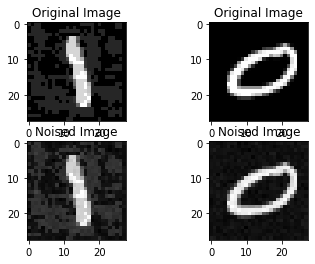

In [6]:
f, axes=plt.subplots(2,2)

#showing images with gaussian noise
axes[0,0].imshow(xtrain[0],cmap="gray")
axes[0,0].set_title("Original Image")
axes[1,0].imshow(traindata[0],cmap='gray')
axes[1,0].set_title("Noised Image")

#showing images with speckle noise
axes[0,1].imshow(xtrain[25000],cmap='gray')
axes[0,1].set_title("Original Image")
axes[1,1].imshow(traindata[25000],cmap="gray")
axes[1,1].set_title("Noised Image")

In [7]:
class noisedDataset(Dataset):
  
  def __init__(self,datasetnoised,datasetclean,labels,transform):
    self.noise=datasetnoised
    self.clean=datasetclean
    self.labels=labels
    self.transform=transform
  
  def __len__(self):
    return len(self.noise)
  
  def __getitem__(self,idx):
    xNoise=self.noise[idx]
    xClean=self.clean[idx]
    y=self.labels[idx]
    
    if self.transform != None:
      xNoise=self.transform(xNoise)
      xClean=self.transform(xClean)
      
    
    return (xNoise,xClean,y)

In [8]:
tsfms=transforms.Compose([
    transforms.ToTensor()
])

trainset=noisedDataset(traindata,xtrain,ytrain,tsfms)
testset=noisedDataset(testdata,xtest,ytest,tsfms)

In [9]:
batch_size=32



trainloader=DataLoader(trainset,batch_size=32,shuffle=True)
testloader=DataLoader(testset,batch_size=1,shuffle=True)

In [10]:
class denoising_model(nn.Module):
  def __init__(self):
    super(denoising_model,self).__init__()
    self.encoder=nn.Sequential(
                  nn.Linear(28*28,256),
                  nn.ReLU(True),
                  nn.Linear(256,128),
                  nn.ReLU(True),
                  nn.Linear(128,64),
                  nn.ReLU(True)
        
                  )
    
    self.decoder=nn.Sequential(
                  nn.Linear(64,128),
                  nn.ReLU(True),
                  nn.Linear(128,256),
                  nn.ReLU(True),
                  nn.Linear(256,28*28),
                  nn.Sigmoid(),
                  )
    
 
  def forward(self,x):
    x=self.encoder(x)
    x=self.decoder(x)
    
    return x

In [11]:
if torch.cuda.is_available()==True:
  device="cuda:0"
else:
  device ="cpu"  
model=denoising_model().to(device)
# model.load_state_dict(torch.load("DAE.pt", map_location=device))
# criterion=nn.MSELoss()
# optimizer=optim.SGD(model.parameters(),lr=0.01,weight_decay=1e-5)
# epochs=150
# l=len(trainloader)
# losslist=list()
# epochloss=0
# running_loss=0
# for epoch in range(epochs):
#   print("Entering Epoch: ",epoch)
#   for dirty,clean,label in tqdm((trainloader)):
#     dirty=dirty.view(dirty.size(0),-1).type(torch.FloatTensor)
#     clean=clean.view(clean.size(0),-1).type(torch.FloatTensor)
#     dirty,clean=dirty.to(device),clean.to(device)
#     #-----------------Forward Pass----------------------
#     output=model(dirty)
#     loss=criterion(output,clean)
#     #-----------------Backward Pass---------------------
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
    
#     running_loss+=loss.item()
#     epochloss+=loss.item()
#   #-----------------Log-------------------------------
#   losslist.append(running_loss/l)
#   running_loss=0
#   print("======> epoch: {}/{}, Loss:{}".format(epoch,epochs,loss.item()))
    
model = denoising_model()
model.load_state_dict(torch.load("DAE.pt", map_location=device))

<All keys matched successfully>

In [12]:
# plt.plot(range(len(losslist)),losslist)

/opt/miniconda3/envs/Pytorch/lib/python3.9/site-packages/torchvision/transforms/functional.py:114: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448255797/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


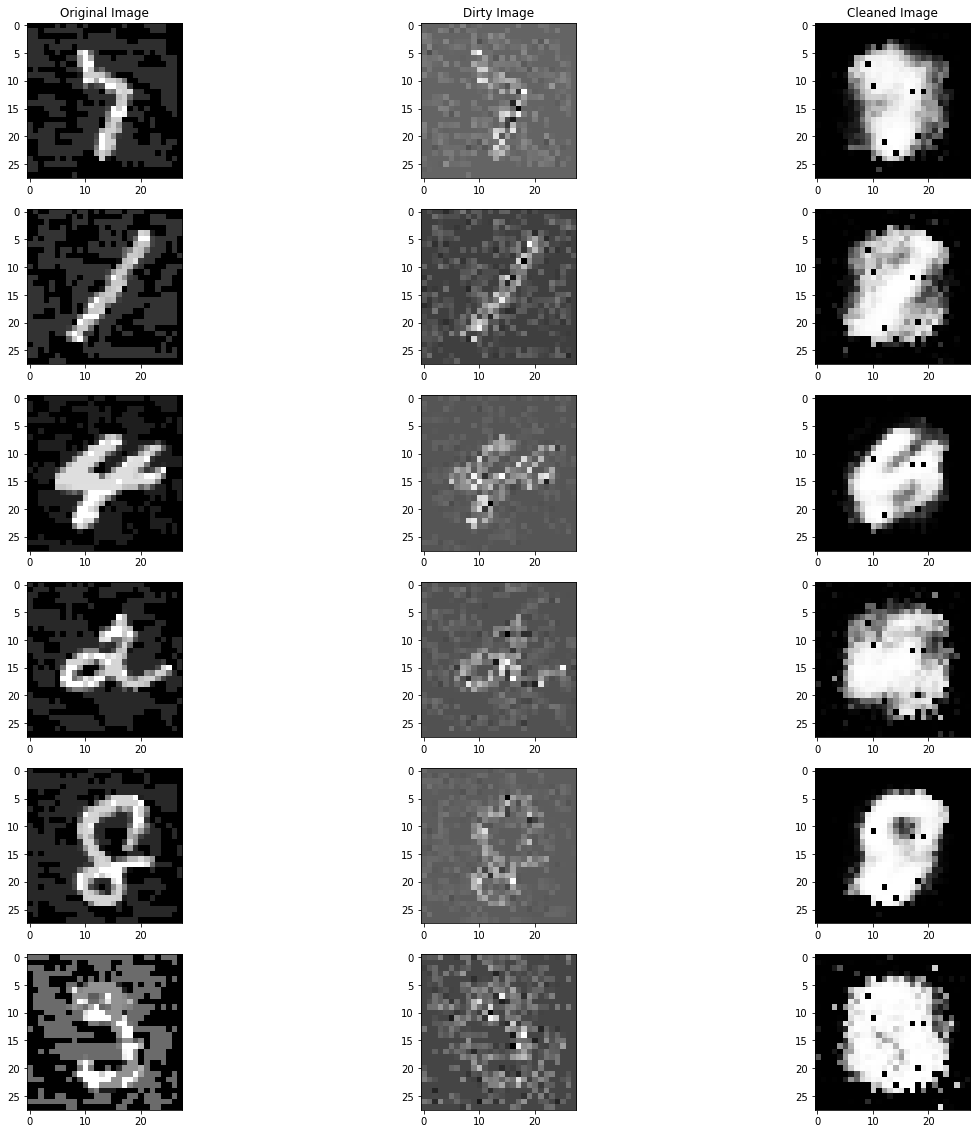

In [13]:
f,axes= plt.subplots(6,3,figsize=(20,20))
axes[0,0].set_title("Original Image")
axes[0,1].set_title("Dirty Image")
axes[0,2].set_title("Cleaned Image")

test_imgs=np.random.randint(0,634,size=6)
for idx in range((6)):
  dirty=testset[test_imgs[idx]][0]
  clean=testset[test_imgs[idx]][1]
  label=testset[test_imgs[idx]][2]
  dirty=dirty.view(dirty.size(0),-1).type(torch.FloatTensor)
  dirty=dirty.to(device)
  output=model.to(device)(dirty)
  
  output=output.view(1,28,28)
  output=output.permute(1,2,0).squeeze(2)
  output=output.detach().cpu().numpy()
  
  dirty=dirty.view(1,28,28)
  dirty=dirty.permute(1,2,0).squeeze(2)
  dirty=dirty.detach().cpu().numpy()
  
  clean=clean.permute(1,2,0).squeeze(2)
  clean=clean.detach().cpu().numpy()
  
  axes[idx,0].imshow(clean,cmap="gray")
  axes[idx,1].imshow(dirty,cmap="gray")
  axes[idx,2].imshow(output,cmap="gray")

In [14]:
test_pred, test_re = [], []
for dirty, clean, labels in testloader:
    # print(dirty.shape)
    dirty=dirty.view(dirty.size(0),-1).type(torch.FloatTensor).to(device)
    test_output=model(dirty)# 32x784 and 784x256
    pred_y=test_output.view(1,28,28).detach().cpu().numpy()
    test_pred=torch.cat((torch.Tensor(test_pred), torch.tensor(pred_y)), dim=0)
    test_re=torch.cat((torch.Tensor(test_re), torch.tensor(labels)), dim=0)
    pass
print(test_pred.shape)
print(test_re.shape)

/tmp/ipykernel_2707/2146269973.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_re=torch.cat((torch.Tensor(test_re), torch.tensor(labels)), dim=0)


torch.Size([634, 28, 28])
torch.Size([634])


In [15]:
train_pred, train_re = [], []
for dirty, clean, labels in trainloader:
    dirty=dirty.view(dirty.size(0),-1).type(torch.FloatTensor)
    train_output = model(dirty.to(device))
    pred_y=train_output.view(-1,28,28).detach().cpu().numpy()
    train_pred = torch.cat((torch.Tensor(train_pred), torch.tensor(pred_y)), dim=0)
    train_re = torch.cat((torch.Tensor(train_re), torch.tensor(labels)), dim=0)
    pass
print(train_pred.shape)
print(train_re.shape)

/tmp/ipykernel_2707/3226588843.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_re = torch.cat((torch.Tensor(train_re), torch.tensor(labels)), dim=0)


torch.Size([60385, 28, 28])
torch.Size([60385])


In [16]:
print('train_size:',train_pred.size())
print('train_target_size:', train_re.size())
print('test_size:',test_pred.size())
print('test_target_size:', test_re.size())

train_size: torch.Size([60385, 28, 28])
train_target_size: torch.Size([60385])
test_size: torch.Size([634, 28, 28])
test_target_size: torch.Size([634])


In [17]:
class dealDataset(Dataset):
  def __init__(self, dataset, labels, transform):
    self.data=dataset
    self.labels=labels
    self.transform=transform
    
  def __len__(self):
    return len(self.data)  
  def __getitem__(self,idx):
    data=self.data[idx].resize(1, 28, 28)
    y=self.labels[idx]

    if self.transform != None:
      data=self.transform(data)

    return (data,y)

      
tsfms=transforms.Compose([
    # transforms.Resize((1, 28, 28)),
    #  transforms.RandomRotation((-180, 180)),
    #  transforms.CenterCrop(28),
    #  transforms.Normalize((0.48),(0.25))
    # transforms.ToTensor()
])  
train_data=dealDataset(train_pred, train_re, tsfms)
test_data=dealDataset(test_pred, test_re, tsfms)

loaders = {
    'train': torch.utils.data.DataLoader(train_data,
                        batch_size=32,
                        shuffle=True,
                        num_workers=0),
    'test': torch.utils.data.DataLoader(test_data,
                       batch_size=32,
                       shuffle=True,
                       num_workers=0),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7fead3ff15b0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7fead3ff1550>}

In [18]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # sefl.conv1 = nn.Conv2d()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        # self.conv2 = nn.Sequential(
        #     nn.Conv2d(16, 32, 5, 1, 2),
        #     nn.ReLU(),
        #     nn.MaxPool2d(2),
        # )
        self.out = nn.Linear(64 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        # x = self.conv2(x)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x    # return x for visualization

In [19]:
cnn = CNN()
# cnn = cnn.cuda()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=3136, out_features=10, bias=True)
)


In [20]:
loss_func = nn.CrossEntropyLoss()
loss_func
optimizer = optim.Adam(cnn.parameters(), lr=3e-4)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0003
    weight_decay: 0
)

In [21]:
loss_list = []
num_epochs = 10
def train(num_epochs, cnn, loaders):
    cnn.train()
    # Traing the model
    total_step = len(loaders['train'])
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            # print(cnn(b_x)[0])
            output = cnn(b_x)[0] 
            # print(output.type(torch.LongTensor))
            # output = output.label.long()
            loss = loss_func(output, b_y.long())
            loss_list.append(loss)
            # clear gradients for this training step
            optimizer.zero_grad()
            # backpropagation, compute gradients
            loss.backward()
            # apply gradients
            optimizer.step()
            if (i+1) % 100 == 0:
#                 print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
                pass
        pass
    pass

model = CNN()
model.load_state_dict(torch.load("CNN_pred.pt"))
train(num_epochs, cnn, loaders)

/opt/miniconda3/envs/Pytorch/lib/python3.9/site-packages/torch/_tensor.py:490: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
/opt/miniconda3/envs/Pytorch/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448255797/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


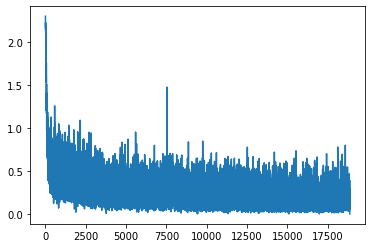

In [22]:
# loss_list = loss_list.detach().numpy()
# print(type(loss_list))
loss_list = [fl.item() for fl in loss_list ]
plt.plot(range(len(loss_list)), loss_list)

In [23]:
def test():
    # Test the model
    cnn.eval()
    accuracy = 0
    total_count = 0
    with torch.no_grad():
        for images, labels in loaders['test']:
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy += (pred_y == labels).sum().item()
            total_count += labels.size(0)
            pass
        accuracy = accuracy / total_count
        print('Test Accuracy of the model on the 634 test images: %.2f' % accuracy)

    pass
test()

Test Accuracy of the model on the 634 test images: 0.36


In [24]:
sample = next(iter(loaders['test']))
imgs, lbls = sample
actual_number = lbls[:10].int().tolist()
actual_number

[4, 8, 8, 5, 1, 1, 2, 4, 3, 5]

In [25]:
test_output, last_layer = cnn(imgs[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')

Prediction number: [8 8 1 7 1 1 1 8 2 8]
Actual number: [4, 8, 8, 5, 1, 1, 2, 4, 3, 5]


In [26]:
true, pred, imgs = [], [], []
for images, labels in loaders['test']:
    test_output, last_layer = cnn(images)
    pred_y = torch.max(test_output, 1)[1].data.squeeze()
    pred = torch.cat((torch.Tensor(pred), pred_y), dim=0)
    imgs = torch.cat((torch.Tensor(imgs), images), dim=0)
    true = torch.cat((torch.Tensor(true), labels), dim=0)
    pass
print(pred.shape)
print(true.shape)
# print(torch.equal(pred, true))
print(imgs.shape)

torch.Size([634])
torch.Size([634])
torch.Size([634, 1, 28, 28])


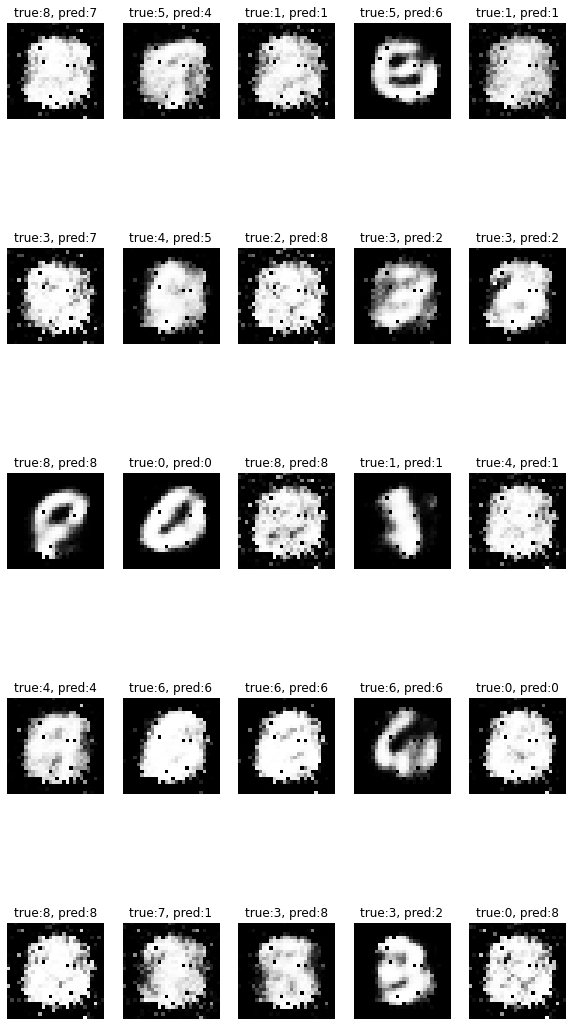

In [60]:
# print(train_data.data.size())
figure = plt.figure(figsize=(10, 20)) # 圖片大小
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(634, size=(1,)).item()
    label = pred[sample_idx] # 隨機print圖
    label_ = true[sample_idx] # 隨機print圖
    img = imgs[sample_idx]
    figure.add_subplot(rows, cols, i) # 排序
    plt.title('true:' + str(int(label_.tolist())) + ', pred:' + str(int(label.tolist())))
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()